# Coded by Frank Zhao

In [74]:
import json
from pprint import pprint
import glob
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [75]:
hist_zip = pd.read_csv('.\data\hist_price_total\hist_price_with_zip.csv')
hist_zip.head()

,property_id,event_name,date,price,price_range_min,price_range_max,price_changed,sqft,datasource_name,source,listing,iso_date,listing_id,previous_event_price,postal_code
0,M3392201642,Price Changed,2020-10-17T17:00:00Z,355000,NaN,NaN,5000,1750,BrightMLS,MLS #PAPH935838,NaN,NaN,NaN,NaN,19116
1,M3392201642,Listed,2020-10-11T17:00:00Z,350000,NaN,NaN,0,1750,BrightMLS,MLS #PAPH935838,NaN,NaN,NaN,NaN,19116
2,M3164904583,Listed,2020-10-11T17:00:00Z,149900,NaN,NaN,0,1176,BrightMLS,MLS #PAPH944164,NaN,NaN,NaN,NaN,19143
3,M3164904583,Sold,2002-03-18T17:00:00Z,70500,NaN,NaN,0,1176,NaN,Public Record,NaN,NaN,NaN,NaN,19143
4,M3164904583,Sold,1988-09-21T17:00:00Z,33900,NaN,NaN,0,1176,NaN,Public Record,NaN,NaN,NaN,NaN,19143


In [76]:
for_sale = pd.read_csv('./data/update_df.csv')
for_sale.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,page_no,rank,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,1,1,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,1,2,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,1,3,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,1,4,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,1,5,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


In [77]:
for_sale.shape

(9562, 26)

In [78]:
for_sale.columns

Index(['property_id', 'prop_type', 'prop_sub_type', 'prop_status', 'price',
       'baths_full', 'baths', 'beds', 'last_update', 'photo_count', 'page_no',
       'rank', 'baths_half', 'city', 'line', 'postal_code', 'state_code',
       'county', 'lat', 'lon', 'neighborhood_name', 'buiding_size(sqft)',
       'lot_size(sqft)', 'agent_id', 'agent_name', 'brand_name'],
      dtype='object')

In [79]:
for_sale = for_sale.drop(columns=['last_update', 'page_no', 'rank'])

In [80]:
for_sale1 = for_sale.copy()

In [81]:
# for_sale.to_csv('.\data\sale.csv',encoding='utf-8', index=False)

In [82]:
# hist_zip.to_csv('.\data\hist_price_total\hist_price_zip_update.csv',encoding='utf-8', index=False)

** **
** **

## House for sale 
## avg price per sqft by zip code

In [83]:
## check NAN in buiding_size(sqft)
sum(for_sale1['buiding_size(sqft)'].isna())

1381

In [84]:
## fill NA
for_sale1['buiding_size(sqft)'].fillna(value=0, inplace=True)

### price per sqft (building)

In [85]:
## drop rows if `buiding_size(sqft)` is 0
for_sale1.drop(for_sale1[(for_sale1['buiding_size(sqft)']==0)].index, inplace=True)

In [86]:
for_sale1.reset_index(drop=True)

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,M3400474681,condo,townhomes,for_sale,94900,1.0,1,4.0,18,NaN,Philadelphia,2077 Bridge St,19124,PA,Philadelphia,40.013765,-75.070389,Wissinoming,1296.0,1064.0,NaN,NaN,Re/Max Eastern-Phil-Grant Ave
8176,M3654238233,condo,townhomes,for_sale,149900,1.0,2,3.0,14,1.0,Philadelphia,1452 N 57th St,19131,PA,Philadelphia,39.974456,-75.235244,West Philadelphia,1026.0,1231.0,950515.0,Nathan S Naness,Keller Williams Philadelphia
8177,M9041602444,condo,duplex_triplex,for_sale,432990,3.0,4,3.0,2,1.0,Philadelphia,7354 Ridge Ave Unit 37,19128,PA,Philadelphia,40.046140,-75.236000,Dearnley Park,1614.0,NaN,948779.0,Michael Sivel,BHHS Fox & Roach Chestnut Hill
8178,M3276555576,condo,condos,for_sale,405000,2.0,2,2.0,25,NaN,Philadelphia,1003 N Bodine St Apt 4,19123,PA,Philadelphia,39.966751,-75.141470,Center City,1020.0,NaN,2229603.0,Michael Stillwell,Keller Williams Philadelphia


In [87]:
for_sale1.shape

(8180, 23)

* After dropping rows with 0s in `'buiding_size(sqft)'`, we have 8180 instances left.

### Compute unit price of building_size

In [88]:
## division
for_sale1['building_price_per_sqft'] = for_sale1['price'] / for_sale1['buiding_size(sqft)']

In [89]:
## check for 0 and inf that might be resulted in division
sum(for_sale1['buiding_size(sqft)'] == 0), sum(np.isinf(for_sale1['building_price_per_sqft']))

(0, 0)

* We are clear that the unit prices have been calculated.

** **

### Create a dataframe that only has `Postal_code` and `avg_building_price_per_sqft`

In [90]:
avg_unit_build_price = for_sale1.groupby('postal_code')['building_price_per_sqft'].mean().reset_index().rename(columns={'building_price_per_sqft':'avg_building_price_per_sqft'}).sort_values(by=['avg_building_price_per_sqft'], ascending=False)

In [91]:
avg_unit_build_price.reset_index(drop=True)

,postal_code,avg_building_price_per_sqft
0,19103,587.155901
1,19102,554.453270
2,19106,427.037200
3,19107,408.610466
4,19123,357.074102
5,19147,338.221716
6,19118,320.910022
7,19130,318.714478
8,19146,306.413243
9,19125,255.478227


### Plotting the result by descending values

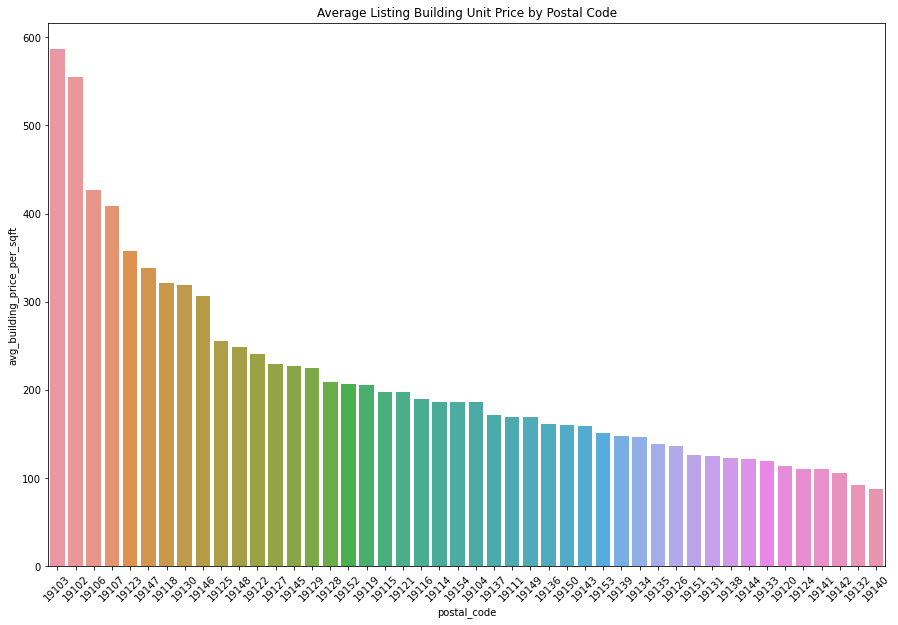

In [92]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,10))

avg_building_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_building_price_per_sqft',
                                      data=avg_unit_build_price,
                                      order=avg_unit_build_price.sort_values('avg_building_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_building_unit_price_plt.set_xticklabels(avg_unit_build_price['postal_code'], rotation=45)
plt.title('Average Listing Building Unit Price by Postal Code')
plt.show()

* The highest building avg unit price is in center city, which makes sense.

** **

### price per sqft (lot)

In [93]:
for_sale2 = for_sale.copy()

In [94]:
## check NAN in lot_size(sqft)
sum(for_sale2['lot_size(sqft)'].isna())

1687

In [95]:
## fill NA in lot_size(sqft)
for_sale2['lot_size(sqft)'].fillna(value=0, inplace=True)

In [96]:
## drop rows if `lot_size(sqft)` is 0
for_sale2.drop(for_sale2[(for_sale2['lot_size(sqft)']==0)].index, inplace=True)

In [97]:
for_sale2.reset_index(drop=True)

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,M4145275110,condo,townhomes,for_sale,62800,1.0,1,3.0,1,NaN,Philadelphia,517 N Simpson St,19151,PA,Philadelphia,39.971127,-75.247816,West Philadelphia,1280.0,1830.0,3294473.0,Leslie Edwards,RealHome Services & Solutions
7870,M4547036087,condo,townhomes,for_sale,299900,2.0,3,3.0,29,1.0,Philadelphia,2820 Almond St,19134,PA,Philadelphia,39.981121,-75.112587,Richmond,1620.0,1296.0,412566.0,Nancy Aulett,Keller Williams Real Estate
7871,M3400474681,condo,townhomes,for_sale,94900,1.0,1,4.0,18,NaN,Philadelphia,2077 Bridge St,19124,PA,Philadelphia,40.013765,-75.070389,Wissinoming,1296.0,1064.0,NaN,NaN,Re/Max Eastern-Phil-Grant Ave
7872,M3654238233,condo,townhomes,for_sale,149900,1.0,2,3.0,14,1.0,Philadelphia,1452 N 57th St,19131,PA,Philadelphia,39.974456,-75.235244,West Philadelphia,1026.0,1231.0,950515.0,Nathan S Naness,Keller Williams Philadelphia


In [98]:
for_sale2.shape

(7874, 23)

* After dropping rows with 0s in `'lot_size(sqft)'`, we have 7874 instances left.

### Compute unit price of lot size

In [99]:
## division
for_sale2['lot_price_per_sqft'] = for_sale2['price'] / for_sale2['lot_size(sqft)']

In [100]:
## ## check for 0 and inf that might be resulted in division
sum(for_sale2['buiding_size(sqft)'] == 0), sum(np.isinf(for_sale2['lot_price_per_sqft']))

(0, 0)

### Create a dataframe that only has `Postal_code` and `avg_lot_price_per_sqft`

In [101]:
avg_unit_lot_price = for_sale2.groupby('postal_code')['lot_price_per_sqft'].mean().reset_index().rename(columns={'lot_price_per_sqft':'avg_lot_price_per_sqft'}).sort_values(by=['avg_lot_price_per_sqft'], ascending=False)

In [102]:
avg_unit_lot_price.reset_index(drop=True)

,postal_code,avg_lot_price_per_sqft
0,19123,7440.654454
1,19102,1540.110681
2,19103,1385.195374
3,19106,1188.420330
4,19107,957.329331
5,19147,705.653089
6,19130,609.493032
7,19146,549.752007
8,19127,483.856738
9,19125,434.226273


### Plotting the result by descending values

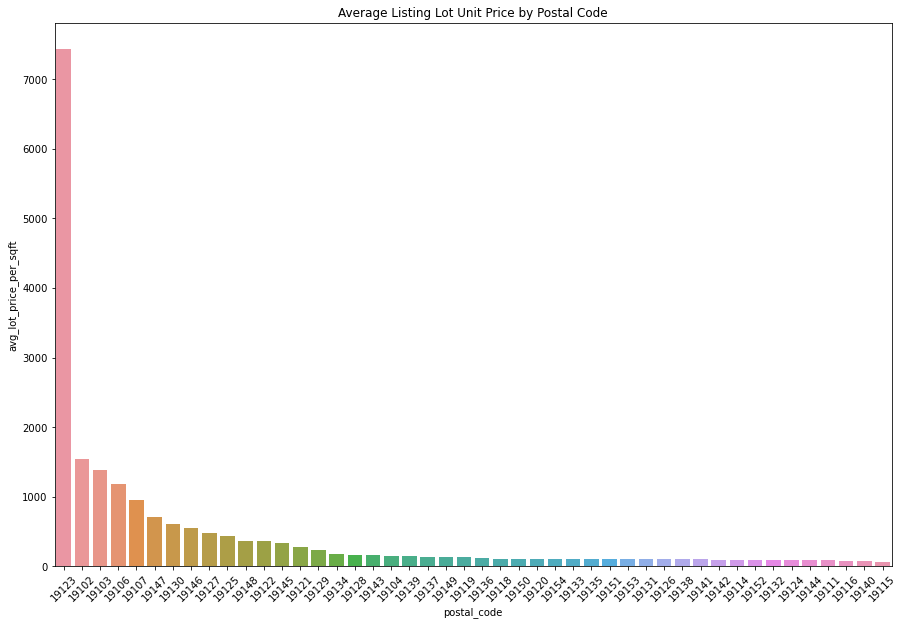

In [103]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,10))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_lot_price_per_sqft',
                                      data=avg_unit_lot_price,
                                      order=avg_unit_lot_price.sort_values('avg_lot_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Lot Unit Price by Postal Code')
plt.show()

* The results shows the unit prices are more pricy in center city. 
* However, it seems like the data is so unbalanced. The `avg_lot_price_per_sqft` in 19123 is way higher than those in center city, which is not very reasonable. 
* Some properties have missing values in `building_size` and some have in `building_size`. By just deleting rows with NAs for one feature will make the unit price imcomparable. 
* Let's remove the property that as long as it has a missing value in either feature or both and see what the chart will look like.

** **

### Let's remove lot and build size that have 0s

In [104]:
for_sale3 = for_sale.copy()

In [105]:
## check NAN in lot_size(sqft) and buiding_size(sqft)
sum(for_sale3['buiding_size(sqft)'].isna()), sum(for_sale3['lot_size(sqft)'].isna())

(1381, 1687)

In [106]:
## drop NAs
for_sale3['lot_size(sqft)'].fillna(value=0, inplace=True)
for_sale3['buiding_size(sqft)'].fillna(value=0, inplace=True)

In [107]:
## check NAN in lot_size(sqft)
sum(for_sale3['buiding_size(sqft)'].isna()), sum(for_sale3['lot_size(sqft)'].isna())

(0, 0)

In [108]:
# drop rows with 0
drop_ridx = for_sale3[ (for_sale3['buiding_size(sqft)'] ==0) | (for_sale3['lot_size(sqft)'] ==0)].index
for_sale3.drop(drop_ridx,inplace=True)

In [109]:
for_sale3.shape

(6546, 23)

* After removing the rows, we have 6546 properties that have both `buiding_size(sqft)` and `lot_size(sqft)`.

In [110]:
for_sale3.reset_index(drop=True).head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,photo_count,baths_half,city,line,postal_code,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,9,NaN,Philadelphia,1516 N 62nd St,19151,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,7,NaN,Philadelphia,6102 Reedland St,19142,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,35,1.0,Philadelphia,5703 N 13th St,19141,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,123,1.0,Philadelphia,1009 Rhawn St,19111,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,33,1.0,Philadelphia,3850 N Bouvier St,19140,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


### Compute unit price of lot size

In [111]:
## division
for_sale3['lot_price_per_sqft'] = for_sale3['price'] / for_sale3['lot_size(sqft)']
for_sale3['build_price_per_sqft'] = for_sale3['price'] / for_sale3['buiding_size(sqft)']

In [112]:
## check for 0 val
sum(for_sale3['buiding_size(sqft)'] == 0), sum(for_sale3['lot_size(sqft)'] == 0)

(0, 0)

In [113]:
## check for inf val
sum(np.isinf(for_sale3['lot_price_per_sqft'])), sum(np.isinf(for_sale3['build_price_per_sqft']))

(0, 0)

* Now we can go ahead and process the data.

### Create two dataframes that only has `Postal_code` with either `avg_lot_price_per_sqft`or `avg_unit_build_price`

In [114]:
avg_unit_build_price = for_sale3.groupby('postal_code')['build_price_per_sqft'].mean().reset_index().rename(columns={'build_price_per_sqft':'avg_build_price_per_sqft'}).sort_values(by=['avg_build_price_per_sqft'], ascending=False)
avg_unit_lot_price = for_sale3.groupby('postal_code')['lot_price_per_sqft'].mean().reset_index().rename(columns={'lot_price_per_sqft':'avg_lot_price_per_sqft'}).sort_values(by=['avg_lot_price_per_sqft'], ascending=False)

In [115]:
avg_unit_build_price.reset_index(drop=True)

,postal_code,avg_build_price_per_sqft
0,19102,830.011564
1,19103,543.504499
2,19106,449.794824
3,19107,447.053006
4,19147,327.182393
5,19130,312.045954
6,19118,299.976726
7,19123,295.630273
8,19146,283.980611
9,19125,250.055211


In [116]:
avg_unit_lot_price.reset_index(drop=True)

,postal_code,avg_lot_price_per_sqft
0,19102,1765.550301
1,19103,1406.901672
2,19106,1240.518342
3,19107,957.329331
4,19147,710.726291
5,19123,653.344688
6,19130,612.706709
7,19146,577.168535
8,19127,497.227977
9,19125,455.728015


### Plotting the result by descending values

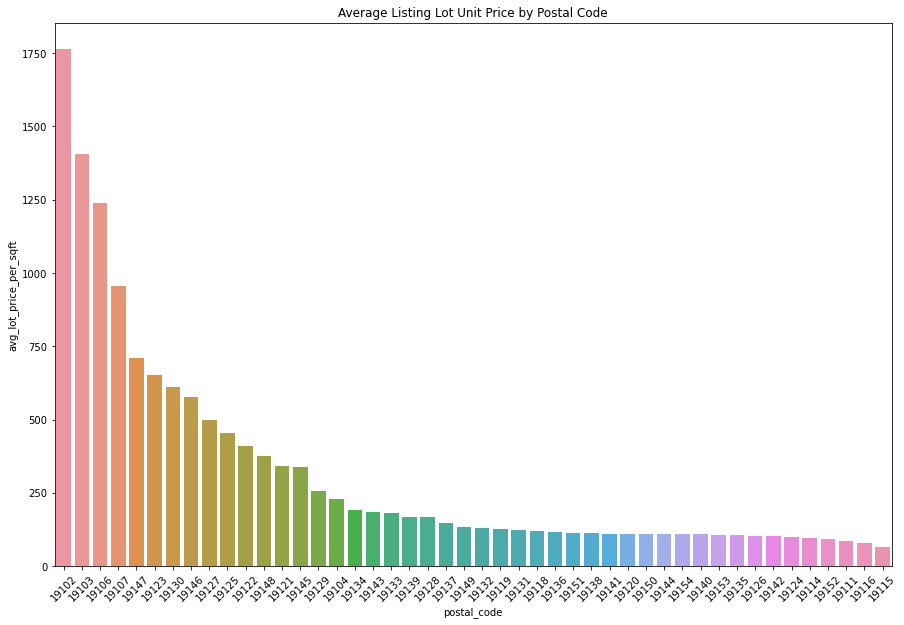

In [117]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,10))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_lot_price_per_sqft',
                                      data=avg_unit_lot_price,
                                      order=avg_unit_lot_price.sort_values('avg_lot_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Lot Unit Price by Postal Code')
plt.show()

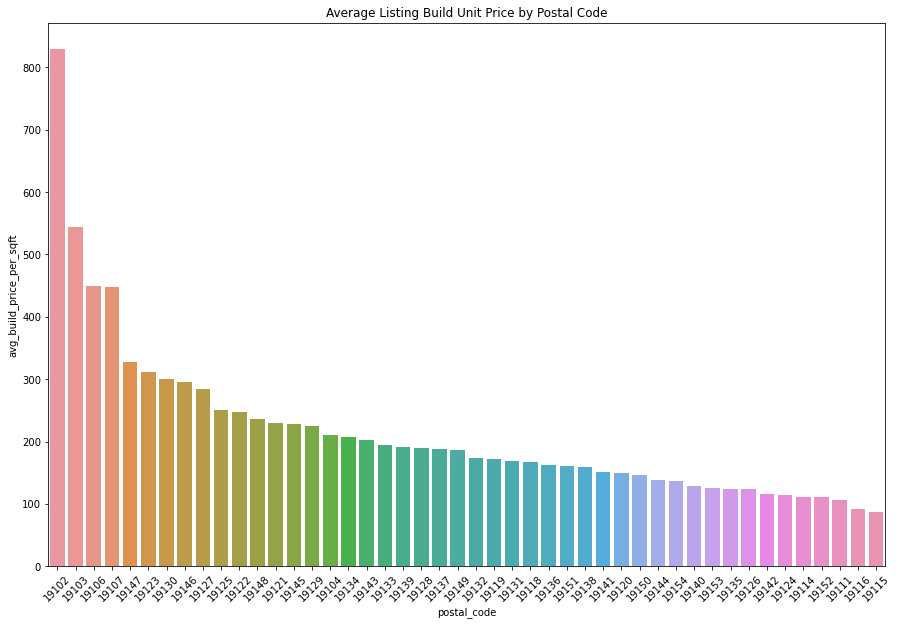

In [118]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,10))

avg_lot_unit_price_plt = sns.barplot(x='postal_code',
                                      y='avg_build_price_per_sqft',
                                      data=avg_unit_build_price,
                                      order=avg_unit_build_price.sort_values('avg_build_price_per_sqft',ascending=False).postal_code,
                                      ax=ax
                                     )
avg_lot_unit_price_plt.set_xticklabels(avg_unit_lot_price['postal_code'], rotation=45)
plt.title('Average Listing Build Unit Price by Postal Code')
plt.show()

* Now both charts makes more sense. we can go ahead and put both in the same canvas and see what it looks like.

** **
### Convert dataframe

In [119]:
# add col to df
avg_unit_build_price['type']='avg_build_price_per_sqft'
avg_unit_lot_price['type']='avg_lot_price_per_sqft'

# rename col
avg_unit_build_price.rename(columns={'avg_build_price_per_sqft':'unit_price'}, inplace=True)
avg_unit_lot_price.rename(columns={'avg_lot_price_per_sqft':'unit_price'}, inplace=True)

In [120]:
avg_unit_combined = pd.concat([avg_unit_build_price, avg_unit_lot_price], axis =0, ignore_index=True)

In [121]:
avg_unit_combined = avg_unit_combined.sort_values(by=['postal_code']).reset_index(drop=True)

In [122]:
avg_unit_combined.head()

,postal_code,unit_price,type
0,19102,830.011564,avg_build_price_per_sqft
1,19102,1765.550301,avg_lot_price_per_sqft
2,19103,543.504499,avg_build_price_per_sqft
3,19103,1406.901672,avg_lot_price_per_sqft
4,19104,227.948611,avg_lot_price_per_sqft


In [123]:
avg_unit_combined['postal_code'] = avg_unit_combined['postal_code'].astype(str)

In [124]:
postal_order = avg_unit_combined['postal_code'].unique().tolist()

In [125]:
avg_unit_combined['postal_code'] = pd.Categorical(avg_unit_combined['postal_code'], categories=postal_order)

### Plotting the result by descending values

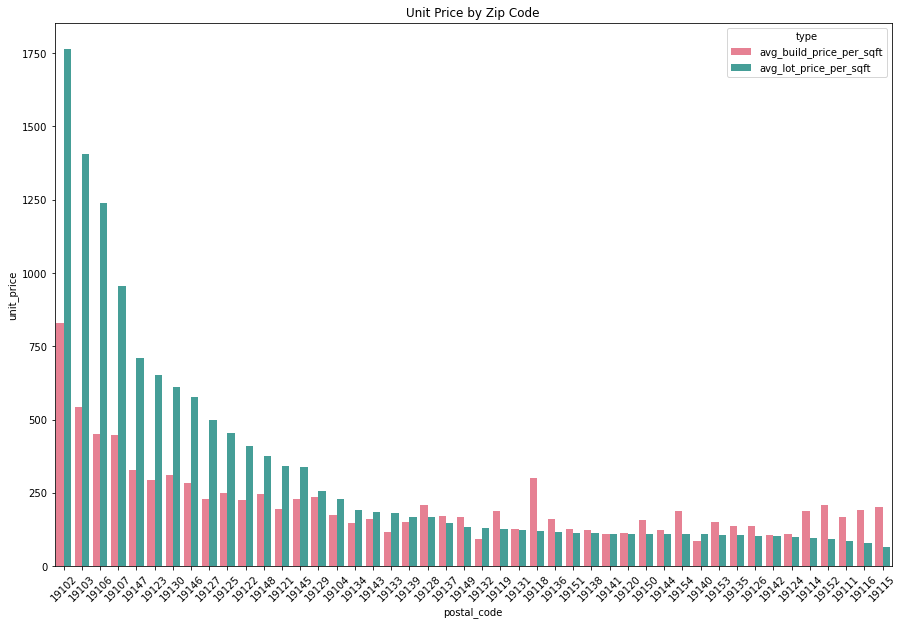

In [192]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,10))
palette = sns.color_palette("husl", 2)
combined_unit_plot = sns.barplot(x='postal_code',
                                 y='unit_price',
                                 hue='type',
                                 palette= palette,
                                 data=avg_unit_combined,
                                 order=avg_unit_combined[avg_unit_combined['type'] == 'avg_lot_price_per_sqft'].sort_values(by="unit_price", ascending=False)['postal_code']
                                 )
plt.xticks(rotation=45)
plt.title('Unit Price by Zip Code')
plt.show()

* In general, `avg_build_price_per_sqft`  to `avg_lot_price_per_sqft` is almost 50 to 50. We can see, especially in center city, the `avg_lot_price_per_sqft` is much higher than `avg_build_price_per_sqft`. It might due to the reason that the lot area is very precious in center city. On the other hand, in the areas where `avg_build_price_per_sqft`  is higher than `avg_lot_price_per_sqft`, I guess people can build larger and more luxury properties on the lot area resulting the average building price is higher than average lot price.

** **
** **

## Get COVID case data

In [127]:
import re

In [128]:
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_zip'
response = requests.request("GET", url)
test_zip = pd.json_normalize(response.json()['rows'])

In [129]:
# test_zip.to_csv(".\data\COVID\phl_case.csv",encoding='utf-8', index=False)

### filter test result

In [130]:
## get zip codes from property df
filt_zip = avg_unit_combined['postal_code'].unique()

In [131]:
filt_test_zip = test_zip.copy()
filter_mask = []

for i in test_zip['zip_code'].unique():
    if i not in filt_zip:
        filter_mask.append(i)
        
## filter rows with zip in filter_mask
filt_test_zip = filt_test_zip[~filt_test_zip['zip_code'].isin(filter_mask)]
filt_test_zip.shape

(92, 7)

* After filtering, we get a total of 92 instances which are 46 positives and 46 negatives.

### Plotting

In [205]:
# sort the zip_code first to match the order of zip_code in properties dataset
sorter = avg_unit_combined[avg_unit_combined['type'] == 'avg_lot_price_per_sqft'].sort_values(by="unit_price", ascending=False)['postal_code'].tolist()
filt_test_zip['zip_code'] = filt_test_zip['zip_code'].astype("category")
filt_test_zip['zip_code'] = filt_test_zip["zip_code"].cat.set_categories(sorter, ordered=True)

In [206]:
filt_test_zip = filt_test_zip.sort_values("zip_code")
filt_test_zip

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp
53,54,None,None,POS,19102,144,2020-11-23T18:20:02Z
43,44,None,None,NEG,19102,4241,2020-11-23T18:20:02Z
71,72,None,None,POS,19103,535,2020-11-23T18:20:02Z
99,100,None,None,NEG,19103,16905,2020-11-23T18:20:02Z
83,84,None,None,POS,19106,380,2020-11-23T18:20:02Z
...,...,...,...,...,...,...,...
86,87,None,None,NEG,19111,25456,2020-11-23T18:20:02Z
102,103,None,None,POS,19116,1467,2020-11-23T18:20:02Z
59,60,None,None,NEG,19116,12373,2020-11-23T18:20:02Z
7,8,None,None,POS,19115,1672,2020-11-23T18:20:02Z


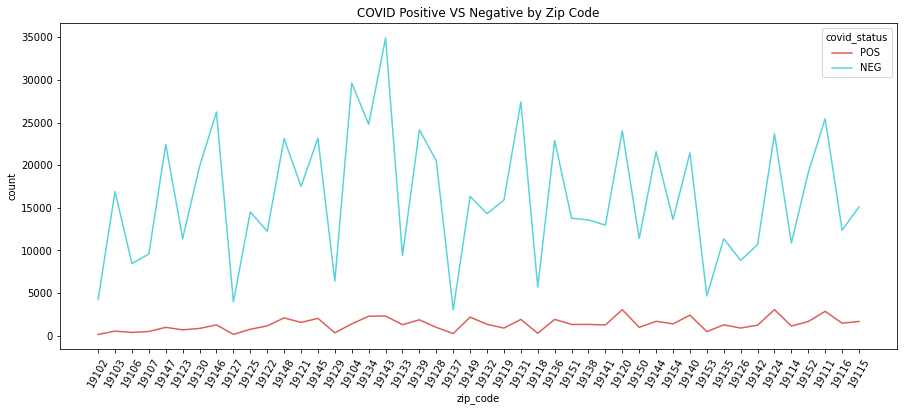

In [280]:
%matplotlib inline
fig, ax=plt.subplots(figsize=(15,6))

palette = sns.color_palette("hls", 2)

test_zip_plot = sns.lineplot(x = "zip_code", 
                             y = "count", 
                             hue = "covid_status", 
                             palette=palette, 
                             data=filt_test_zip
                             
                            )
plt.xticks(rotation=60)
plt.title('COVID Positive VS Negative by Zip Code')
plt.show()

* First of all, there are more Negative cases than the Positive cases. The trend of positive cases seem not to match the trend of negative cases.

### Positive Cases and Average Price Together

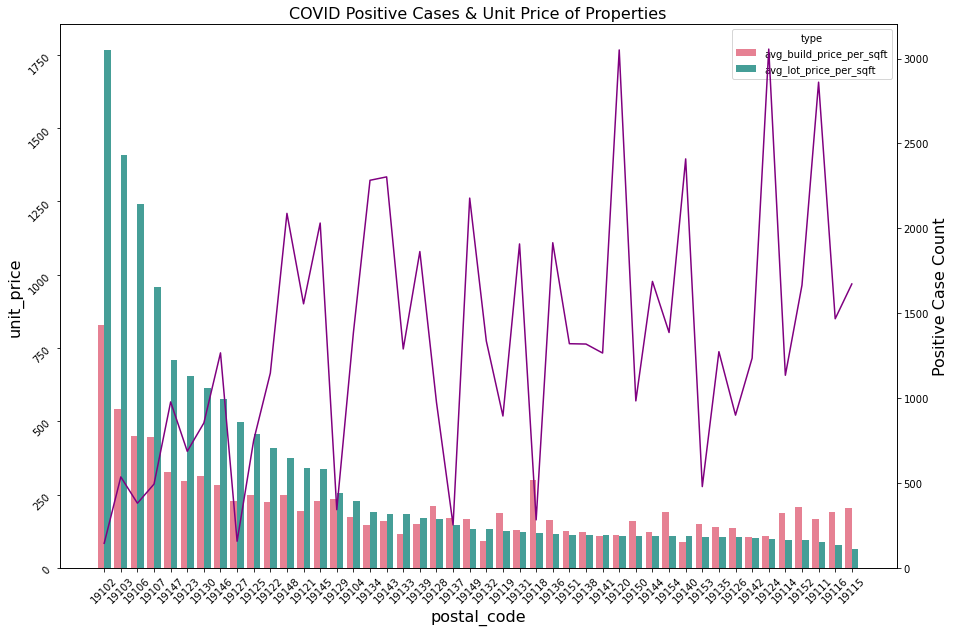

In [224]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_title("COVID Positive Cases & Unit Price of Properties", fontsize=16)
ax1.set_xlabel("postal_code", fontsize=16)
ax1.set_ylabel("unit_price", fontsize=16)

palette = sns.color_palette("husl", 2)
ax2 = sns.barplot(x='postal_code',
                  y='unit_price',
                  hue='type',
                  palette = palette,
                  data=avg_unit_combined,
                  order=avg_unit_combined[avg_unit_combined['type'] == 'avg_lot_price_per_sqft'].sort_values(by="unit_price", ascending=False)['postal_code']
                 )
# ax2.legend(loc='top', bbox_to_anchor=(1.1, 0.5), ncol=1)

ax1.tick_params(axis='y')
ax2 = ax1.twinx()

ax2.set_ylabel("Positive Case Count", fontsize=16)
ax2 = sns.lineplot(x = "zip_code", 
                   y = "count", 
                   color='purple', 
                   data=filt_test_zip[filt_test_zip['covid_status']=="POS"]
                  )
ax2.tick_params(axis='y')
ax1.tick_params(labelrotation=45)

plt.show()

* The there are a lot of peaks in the postive cases trend. Some regions where positive cases is high, also have ralatively high average lot price. However, there are some exteme cases such as, in center city, the number of positve cases is not very high however, the average property prices are still high there. 

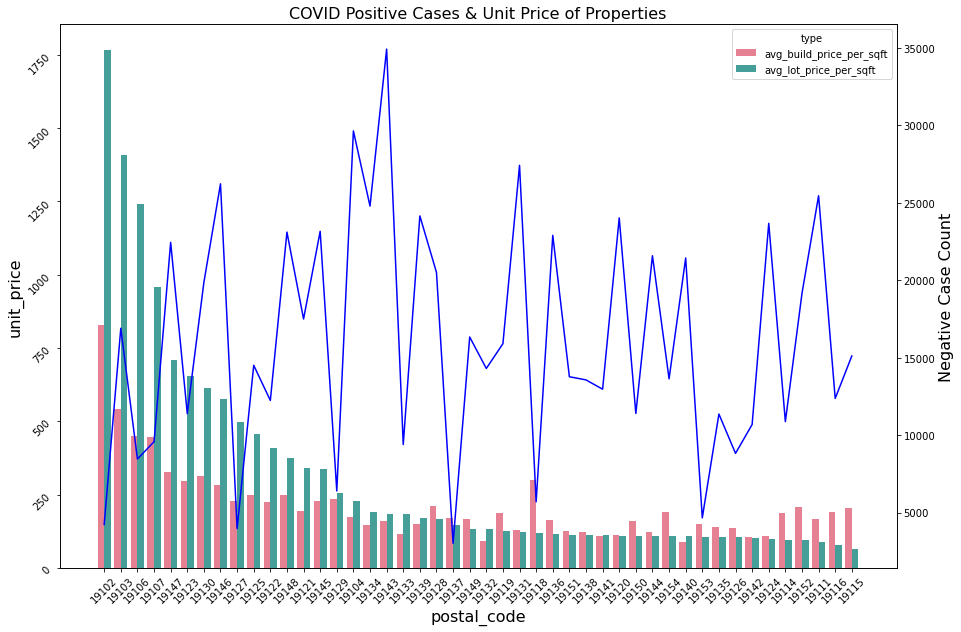

In [230]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_title("COVID Positive Cases & Unit Price of Properties", fontsize=16)
ax1.set_xlabel("Postal_code", fontsize=16)
ax1.set_ylabel("Unit_price", fontsize=16)

palette = sns.color_palette("husl", 2)
ax2 = sns.barplot(x='postal_code',
                  y='unit_price',
                  hue='type',
                  palette = palette,
                  data=avg_unit_combined,
                  order=avg_unit_combined[avg_unit_combined['type'] == 'avg_lot_price_per_sqft'].sort_values(by="unit_price", ascending=False)['postal_code']
                 )

ax1.tick_params(axis='y')
ax2 = ax1.twinx()

ax2.set_ylabel("Negative Case Count", fontsize=16)
ax2 = sns.lineplot(x = "zip_code", 
                   y = "count", 
                   color='blue', 
                   data=filt_test_zip[filt_test_zip['covid_status']=="NEG"],
                   legend=True
                  )
ax2.tick_params(axis='y')

ax1.tick_params(labelrotation=45)

plt.show()

* The results shows as similar as the previous one. 

### All Cases and Average Price Together

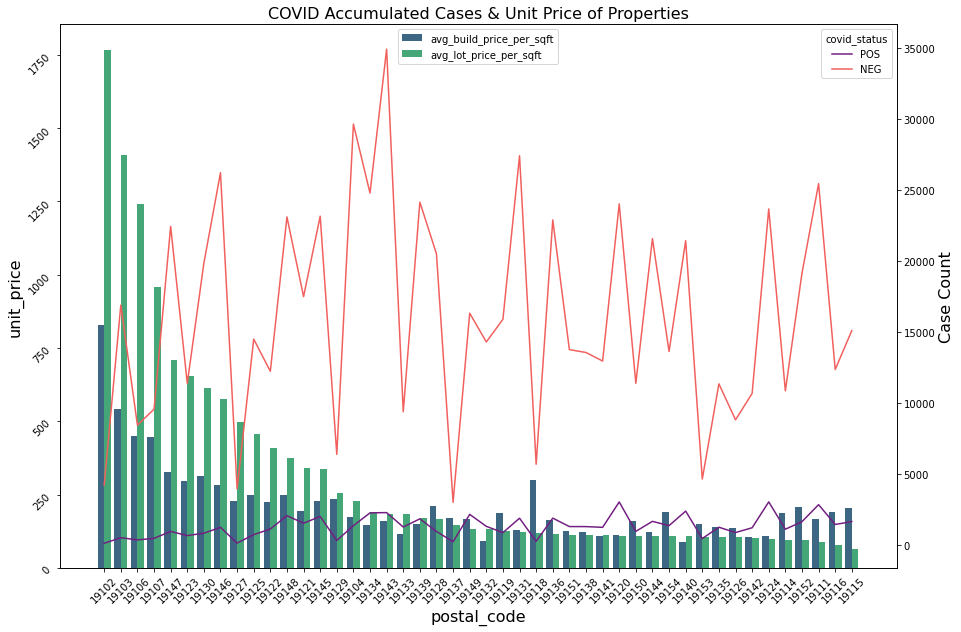

In [278]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_title("COVID Accumulated Cases & Unit Price of Properties", fontsize=16)
ax1.set_xlabel("Postal_code", fontsize=16)
ax1.set_ylabel("Unit_price", fontsize=16)

palette = sns.color_palette("viridis",2)
ax2 = sns.barplot(x='postal_code',
                  y='unit_price',
                  hue='type',
                  palette = palette,
                  data=avg_unit_combined,
                  order=avg_unit_combined[avg_unit_combined['type'] == 'avg_lot_price_per_sqft'].sort_values(by="unit_price", ascending=False)['postal_code']
                 )

ax1.tick_params(axis='y')
ax2 = ax1.twinx()

palette = sns.color_palette("magma",2)
ax2.set_ylabel("Case Count", fontsize=16)
ax2 = sns.lineplot(x = "zip_code", y = "count", hue = "covid_status", palette=palette, data=filt_test_zip)
ax2.tick_params(axis='y')
ax1.tick_params(labelrotation=45)
ax1.legend(loc='upper center')
plt.show()